# 워드클라우드

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 재시작

In [1]:
!pip install konlpy > /dev/null

In [35]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving pythonC.txt to pythonC (1).txt


In [51]:
from google.colab import files
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving 다운로드 (1).jfif to 다운로드 (1).jfif


## 한글 텍스트 전처리

In [12]:
with open(textfile)as fp:
    text = fp.read()

In [13]:
from konlpy.tag import Okt
okt = Okt()

In [14]:
tokens = okt.nouns(text)
tokens[:10]

['파이썬', '코딩', '위해', '프로그래밍', '언어', '중', '하나로', '다른', '프로그래밍', '언어']

In [8]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [15]:
# 한글폰트사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- 아래 두 과정을 반복해서 불용어를 정리

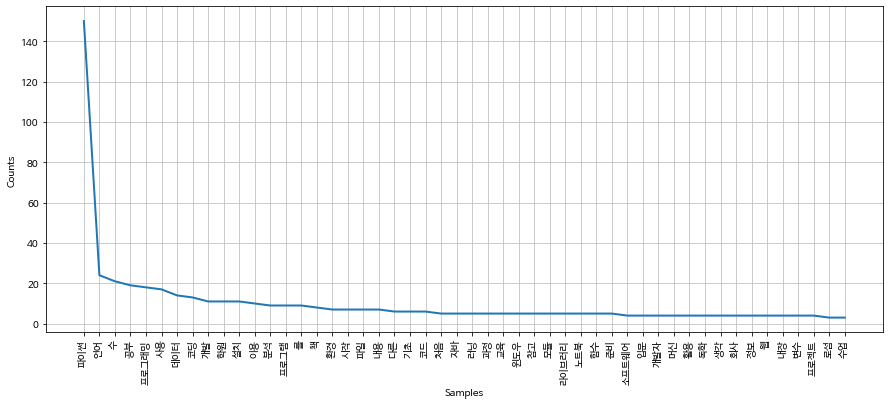

In [27]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [26]:
stoptext = '''
    것 중 이 등 제 로 위해 때문 오늘 이번 그 장고 저 반 글 가지 정도 이제 예제 지원 편 급 편이 원래 귀
'''
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['파이썬', '코딩', '프로그래밍', '언어', '하나로', '다른', '프로그래밍', '언어', '난이도', '개발']

## 워드 클라우드 그리기

In [52]:
from wordcloud import WordCloud
from PIL import Image

In [29]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path = path, relative_scaling=0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))

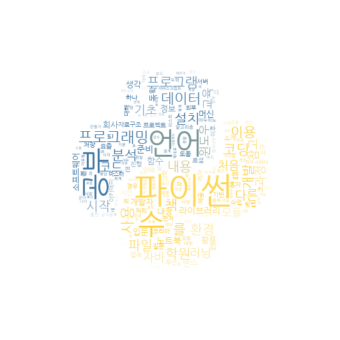

In [59]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트 그림에 표시

In [53]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [54]:
wc = WordCloud(
    font_path = path, relative_scaling=0.2,
    background_color='white', mask = mask,
).generate_from_frequencies(dict(data))

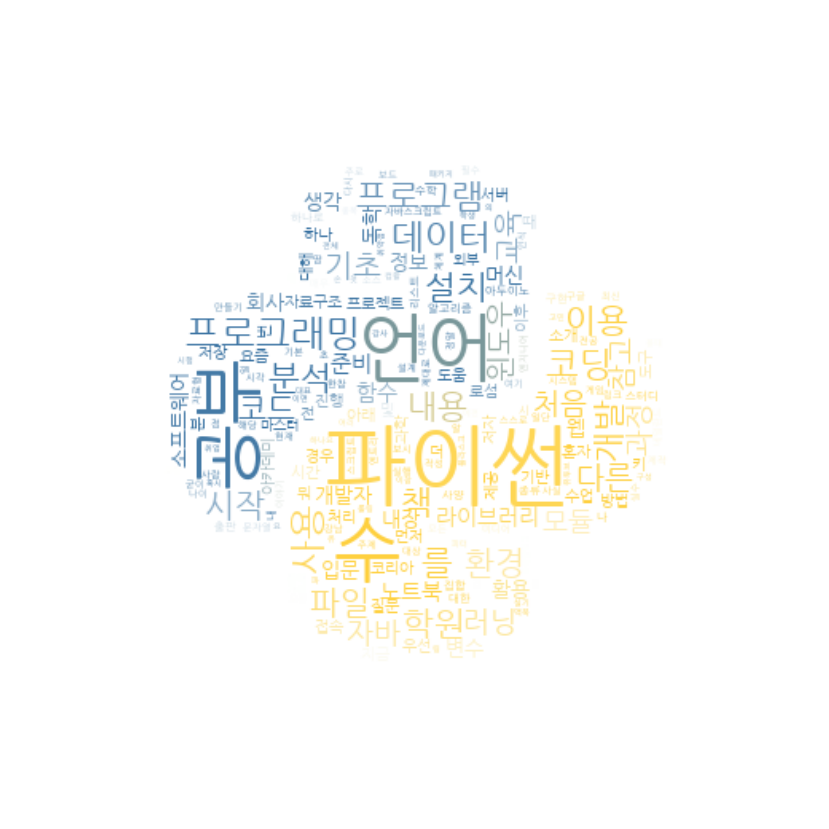

In [62]:
plt.figure(figsize = (15,15))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()